In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree, ensemble, model_selection,preprocessing, datasets

In [3]:
# 使用红酒数据对这种算法进行对比
wine = datasets.load_wine()
X_train, X_test, y_train, y_test = model_selection.train_test_split(wine.data, wine.target, test_size=0.3)
clf = tree.DecisionTreeClassifier(random_state=66).fit(X_train, y_train)
rfc = ensemble.RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
score_d = clf.score(X_test, y_test)
score_f = rfc.score(X_test, y_test)
print('决策树的准确率：%f, 随机森林的准确率：%f' % (score_d, score_f))

决策树的准确率：0.925926, 随机森林的准确率：0.981481


Decision tree的准确率为：0.877341
RandomForest的准确率为：0.983333


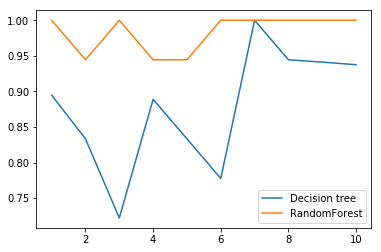

In [6]:
# 决策树和随机森林在交叉验证下的对比
clf = tree.DecisionTreeClassifier(random_state=10)
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=10)
label = 'Decision tree'
for model in [clf, rfc]:
    score = model_selection.cross_val_score(model, wine.data, wine.target, cv = 10)
    print('%s的准确率为：%f' % (label, score.mean()))
    plt.plot(range(1, 11), score, label=label)
    plt.legend()
    label = 'RandomForest'
plt.show()

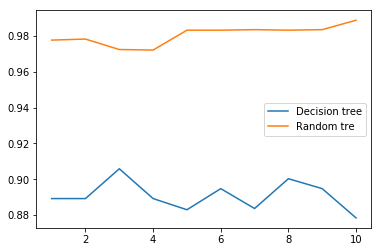

In [8]:
# 10组交叉验证下效果的对比
clf_score = []
rfc_score = []
for i in range(10):
    clf = tree.DecisionTreeClassifier()
    score = model_selection.cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_score.append(score)
    
    # 随机森林
    rfc = ensemble.RandomForestClassifier(n_estimators=100,)
    score = model_selection.cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_score.append(score)

plt.plot(range(1, 11), clf_score, label='Decision tree')
plt.plot(range(1, 11), rfc_score, label='Random tre')
plt.legend()
plt.show()
    

In [ ]:
# n_estimators的学习曲线
rfc_score = []
for i in range(1, 200):
    rfc = ensemble.RandomForestClassifier(n_estimators=i)
    score_mean = model_selection.cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
#     score = rfc.score(X_test, y_test)
    rfc_score.append(score)
# print('在%d个估算器下准确率最大，最大准确率为：%f' % (rfc_score.index(max(rfc_score)) * 10 + 1, max(rfc_score))
print(max(rfc_score), )
plt.plot(range(1, 200), score_mean)
plt.xlabel('n_estimators', rfc_score.index(max(rfc_score)) * 10 + 1)
plt.ylabel('score')
plt.show()

In [16]:
rfc_score

[0.8703703703703703,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9444444444444444,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9444444444444444,
 0.9444444444444444,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9629629629629629]

In [17]:
range(1, 200, 10)

range(1, 200, 10)